<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Типизация-данных" data-toc-modified-id="Типизация-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Типизация данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#От-площади" data-toc-modified-id="От-площади-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>От площади</a></span></li><li><span><a href="#От-количества-комнат" data-toc-modified-id="От-количества-комнат-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>От количества комнат</a></span></li><li><span><a href="#От-удаленности-от-центра" data-toc-modified-id="От-удаленности-от-центра-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>От удаленности от центра</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Квартиры-в-центре" data-toc-modified-id="Квартиры-в-центре-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Квартиры в центре</a></span></li><li><span><a href="#Влияние-на-цену" data-toc-modified-id="Влияние-на-цену-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Влияние на цену</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Заказчиком предоставлен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Задача — установить параметры для определения рыночной стоимости объектов недвижимости, что позволит построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Ход проекта**

* Изучить общую картину данных
* Обработать данные для дальнейшего анализа (привести к правильным типам, удалить дубликаты, обработать пропуски
* Провести расчеты, добавить в тблицу дополнительные столбцы 
* Провести анализ, ответить на вопросы заказчика
* Сделать выводы из исследования

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
    df = pd.read_csv('/home/judah/Documents/practicum/projects/3_exploratory_data_analysis/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.options.display.max_columns = None
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.isna().sum() #исследуем пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

В предоставленном в датасете 21 столбце обнаружены ошибки и недочеты, для исправления которых нужно выполнить следующие задачи на этапе предобработки данных:  

***Типизация данных***   

* формат столбца с датой публикации `first_day_exposition` перевести в формат DateTime и отбросить бесполезный в данном случае показатель времени
* столбцы с количеством балконов `balcony`, этажей `floors total`, дней размещения объявления `days_exposition`, а также парков и прудов в радиусе 3 км `parks_around3000` и `ponds_around3000 ` перевести в формат *int64*, так как значения не могу быть дробными априори
* столбец `is_apartment` перевести к *булевому типу*
* исправить `cityCenters_nearest` на змеиный регистр

***Пропуски в данных***   

Обнаружены пропуски в следующих столбцах:  

* `ceiling_height`
* `floors_total`
* `living_area`
* `is_apartment` 
* `kitchen_area`
* `balcony`
* `locality_name` 
* `airports_nearest`
* `cityCenters_nearest`
* `parks_around3000`
* `parks_nearest`
* `ponds_around3000`
* `ponds_nearest`
* `days_exposition`

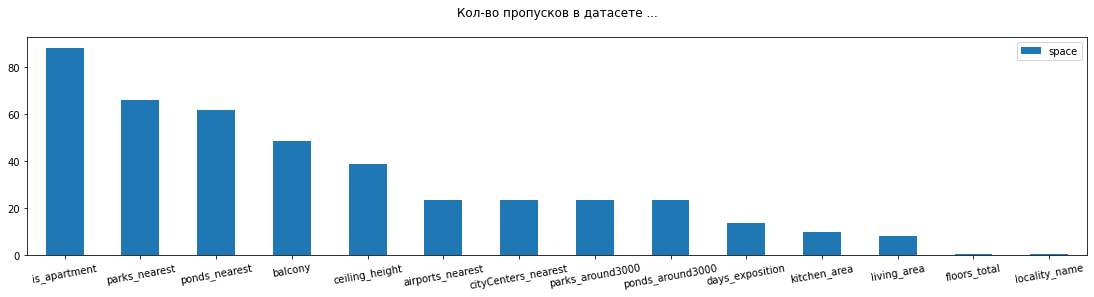

In [7]:
def pass_value(df): # пропущенные значения бары
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = False)
        .plot(kind= 'bar', figsize=(19,4), rot = 10)
        .set_title('Кол-во пропусков в датасете ...' + '\n')
    );
    
pass_value(df)

## Предобработка данных

In [8]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True) #cityCenters_nearest на змеиный_регистр

### Дубликаты

In [9]:
df.duplicated().sum()

0

Дубликатов в данных не обнаружено

### Заполнение пропусков

В столбцах `ceiling_height`, `floors_total`, `days_exposition` причина пропусков видится банальная - продавец то ли от незнания, то ли от лени ее не указал. Столбцы `city_сenters_nearest`, `airports_nearest` заполнены автоматически. В этих столбцах с числовыми значениями - наиболее безопасный для достоверности данных способ - заполнить пропуски медианными значениями.

In [10]:
to_fill_list = ['ceiling_height', 'floors_total', 'airports_nearest', 'days_exposition']
for column in to_fill_list: 
    df[column].fillna(df[column].median(), inplace=True)
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest            0
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

Проведем проверку на корректность значений площадей (с учетом коридоров, сан.узлов, балконов), а также этажности.

In [11]:
df['check_area'] = df.living_area + df.kitchen_area < df.total_area * 0.9
df['check_floor'] = df.floors_total >= df.floor

In [12]:
display(df.check_area.value_counts())
display(df.check_floor.value_counts())

True     20507
False     3192
Name: check_area, dtype: int64

True     23662
False       37
Name: check_floor, dtype: int64

In [13]:
df = df.query('check_floor == True') #избавимся от некорректных объявлений по этажности
df.shape

(23662, 24)

`living_area', 'kitchen_area'`, заполним средним соотношением жилой площади/площади кухни к общей, предварительно рассчитав эти соотношения

In [14]:
df['living_to_total_area_ratio'] = df.living_area / df.total_area
df['kitchen_to_total_area_ratio'] = df.kitchen_area / df.total_area
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,check_floor,living_to_total_area_ratio,kitchen_to_total_area_ratio
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,True,True,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,True,True,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,True,True,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False,True,NaN,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,True,True,0.320000,0.410000


In [15]:
df.loc[(df.check_area == False & df.living_area.isna()), 'living_area'] = df[df['check_area'] == False & df['living_area'].isna()]['total_area'] * df['living_to_total_area_ratio'].mean()

In [16]:
df.kitchen_area.fillna(df[df.kitchen_area.isna()]['total_area'] * df['kitchen_to_total_area_ratio'].mean(), inplace=True)

Столбец `is_apartment`, указывает, является ли объект апартаментами или нет. Если объект - не апартаменты, то скорее всего продавец просто ничего не укажет в соответствующем поле. Соответственно, с достаточно большой долей уверенности можно утверждать, что пропущенные значения означают - нет, не является и может быть заполнен ***False***.   

Аналогично в случае с балконами - при отсутствии значения скорее всего балкон отсутствует и может быть заполнен нулем. 

Столбец `locality_name` имеет всего 49 пропущнных значений, они не окажут на наше исследование существенного влияния, от них можем без зазрения совести избавиться

In [17]:
df.isna().sum()

total_images                       0
last_price                         0
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                     0
floors_total                       0
living_area                        0
floor                              0
is_apartment                   20887
studio                             0
open_plan                          0
kitchen_area                       0
balcony                        11503
locality_name                     49
airports_nearest                   0
city_centers_nearest            5512
parks_around3000                5511
parks_nearest                  15592
ponds_around3000                5511
ponds_nearest                  14569
days_exposition                    0
check_area                         0
check_floor                        0
living_to_total_area_ratio      1893
kitchen_to_total_area_ratio     2264
dtype: int64

In [18]:
df.is_apartment.fillna(False, inplace=True)
df.balcony.fillna(0, inplace=True)
df.dropna(subset=['locality_name'], inplace=True)
df.isna().sum()

total_images                       0
last_price                         0
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                     0
floors_total                       0
living_area                        0
floor                              0
is_apartment                       0
studio                             0
open_plan                          0
kitchen_area                       0
balcony                            0
locality_name                      0
airports_nearest                   0
city_centers_nearest            5504
parks_around3000                5503
parks_nearest                  15558
ponds_around3000                5503
ponds_nearest                  14545
days_exposition                    0
check_area                         0
check_floor                        0
living_to_total_area_ratio      1888
kitchen_to_total_area_ratio     2255
dtype: int64

Пропуски в столбцах с наличием парков и прудов в пределах 3 километров `parks_around3000` и `ponds_around3000`, исходя из источника появления данных значений (заполнение на основании картографических данных) также означают их отсутствие, их мы заполним нулем. Столбцы же с расстоянием до ближайших парков и прудов заполним значением 3001, что будет означать - "удалены более, чем на 3 км" и одновременно позволит привести тип данных к единственно верному

![](/home/judah/Pictures/photo_2022-03-26_23-56-20.jpg)

In [19]:
df.parks_around3000.fillna(0, inplace=True)
df.ponds_around3000.fillna(0, inplace=True)
df.parks_nearest.fillna(3001, inplace=True)
df.ponds_nearest.fillna(3001, inplace=True)
df.isna().sum()

total_images                      0
last_price                        0
total_area                        0
first_day_exposition              0
rooms                             0
ceiling_height                    0
floors_total                      0
living_area                       0
floor                             0
is_apartment                      0
studio                            0
open_plan                         0
kitchen_area                      0
balcony                           0
locality_name                     0
airports_nearest                  0
city_centers_nearest           5504
parks_around3000                  0
parks_nearest                     0
ponds_around3000                  0
ponds_nearest                     0
days_exposition                   0
check_area                        0
check_floor                       0
living_to_total_area_ratio     1888
kitchen_to_total_area_ratio    2255
dtype: int64

Показатель удаленности от центра в случае пропусков заполним максимальным, так как в автоматически заполненных данных пропущенное значение с высокой долей вероятности означает удаленность от центра, не поддающуюся расчету. 

In [20]:
df.city_centers_nearest.fillna(df.city_centers_nearest.max(), inplace=True)

In [21]:
df.city_centers_nearest.describe()

count    23613.000000
mean     26263.797950
std      23152.362736
min        181.000000
25%      10935.000000
50%      14996.000000
75%      35219.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Созданные столбцы с соотношением площадей заполним средним

In [22]:
df.living_to_total_area_ratio.fillna(df.living_to_total_area_ratio.mean(), inplace=True)
df.kitchen_to_total_area_ratio  .fillna(df.kitchen_to_total_area_ratio.mean(), inplace=True)

In [23]:
df.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                   0
living_area                    0
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                   0
balcony                        0
locality_name                  0
airports_nearest               0
city_centers_nearest           0
parks_around3000               0
parks_nearest                  0
ponds_around3000               0
ponds_nearest                  0
days_exposition                0
check_area                     0
check_floor                    0
living_to_total_area_ratio     0
kitchen_to_total_area_ratio    0
dtype: int64

Данные очищены,теперь исправим их ***тип*** там, где это требуется

### Типизация данных

In [24]:
df.first_day_exposition = pd.to_datetime(df.first_day_exposition, format='%Y-%m-%d') #приведем дату размещения к формату Datetime
columns_to_change = ['balcony', 'floors_total', 'days_exposition', 'parks_around3000', 'ponds_around3000'] #приведем значения к целочисленным
for column in columns_to_change: df[column] = df[column].astype('int64')
display(df.head())
display(df.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,check_floor,living_to_total_area_ratio,kitchen_to_total_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.00000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,True,True,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.00000,2,посёлок Шушары,12817.0,18603.0,0,3001.0,0,3001.0,81,True,True,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.30000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,True,True,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.810417,9,False,False,False,29.78777,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,False,True,0.564830,0.187361
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.00000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,True,True,0.320000,0.410000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 23613 non-null  int64         
 1   last_price                   23613 non-null  float64       
 2   total_area                   23613 non-null  float64       
 3   first_day_exposition         23613 non-null  datetime64[ns]
 4   rooms                        23613 non-null  int64         
 5   ceiling_height               23613 non-null  float64       
 6   floors_total                 23613 non-null  int64         
 7   living_area                  23613 non-null  float64       
 8   floor                        23613 non-null  int64         
 9   is_apartment                 23613 non-null  bool          
 10  studio                       23613 non-null  bool          
 11  open_plan                    23613 non-nu

None

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:
* цену квадратного метра
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [25]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,check_floor,living_to_total_area_ratio,kitchen_to_total_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.00000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,True,True,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.00000,2,посёлок Шушары,12817.0,18603.0,0,3001.0,0,3001.0,81,True,True,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.30000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,True,True,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.810417,9,False,False,False,29.78777,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,False,True,0.564830,0.187361
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.00000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,True,True,0.320000,0.410000


In [26]:
def weekday_name(day_number): #функция для перевода номера дня недели в название
    if day_number == 0:
        return "Понедельник"
    if day_number == 1:
        return "Вторник"
    if day_number == 2:
        return "Среда"
    if day_number == 3:
        return "Четверг"
    if day_number == 4:
        return "Пятница"
    if day_number == 5:
        return "Суббота"
    return "Воскресенье"

In [27]:
def month_name(month_number): #функция для перевода номера месяца в название
    if month_number == 1:
        return "Январь"
    if month_number == 2:
        return "Февраль"
    if month_number == 3:
        return "Март"
    if month_number == 4:
        return "Апрель"
    if month_number == 5:
        return "Май"
    if month_number == 6:
        return "Июнь"
    if month_number == 7:
        return "Июль"
    if month_number == 8:
        return "Август"
    if month_number == 9:
        return "Сентябрь"
    if month_number == 10:
        return "Октябрь"
    if month_number == 11:
        return "Ноябрь"
    return "Декабрь"

In [28]:
df['square_meter_price'] = df['last_price'] / df['total_area'] #цена квадратного метра
df['weekday'] = df['first_day_exposition'].dt.weekday.apply(weekday_name) #день недели
df['month'] = df['first_day_exposition'].dt.month.apply(month_name) #месяц
df['year'] = df['first_day_exposition'].dt.year #год
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,check_floor,living_to_total_area_ratio,kitchen_to_total_area_ratio,square_meter_price,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.00000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,True,True,0.472222,0.231481,120370.370370,Четверг,Март,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.00000,2,посёлок Шушары,12817.0,18603.0,0,3001.0,0,3001.0,81,True,True,0.460396,0.272277,82920.792079,Вторник,Декабрь,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.30000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,True,True,0.612500,0.148214,92785.714286,Четверг,Август,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.810417,9,False,False,False,29.78777,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,False,True,0.564830,0.187361,408176.100629,Пятница,Июль,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.00000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,True,True,0.320000,0.410000,100000.000000,Вторник,Июнь,2018


In [29]:
def floor_type(data): #функция для типизации этажей
    if data['floor'] == 1:
        return "Первый"
    if data['floor'] == data['floors_total']:
        return "Последний"
    return "Другой"

In [30]:
df['floor_type'] = df.apply(floor_type, axis=1)
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,check_floor,living_to_total_area_ratio,kitchen_to_total_area_ratio,square_meter_price,weekday,month,year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.00000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,True,True,0.472222,0.231481,120370.370370,Четверг,Март,2019,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.00000,2,посёлок Шушары,12817.0,18603.0,0,3001.0,0,3001.0,81,True,True,0.460396,0.272277,82920.792079,Вторник,Декабрь,2018,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.30000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,True,True,0.612500,0.148214,92785.714286,Четверг,Август,2015,Другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,89.810417,9,False,False,False,29.78777,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,False,True,0.564830,0.187361,408176.100629,Пятница,Июль,2015,Другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.00000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,True,True,0.320000,0.410000,100000.000000,Вторник,Июнь,2018,Другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.10000,0,городской посёлок Янино-1,26726.0,65968.0,0,3001.0,0,3001.0,55,True,True,0.473684,0.299342,95065.789474,Понедельник,Сентябрь,2018,Другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,False,False,False,14.40000,1,посёлок Парголово,52996.0,19143.0,0,3001.0,0,3001.0,155,True,True,0.284182,0.386059,99195.710456,Четверг,Ноябрь,2017,Другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.442930,22,False,False,False,18.90000,2,Санкт-Петербург,23982.0,11634.0,0,3001.0,0,3001.0,95,False,True,0.564830,0.263966,110544.692737,Четверг,Апрель,2019,Другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,False,False,8.81000,0,посёлок Мурино,26726.0,65968.0,0,3001.0,0,3001.0,189,True,True,0.465320,0.265682,87454.764777,Среда,Май,2018,Другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,False,False,6.50000,2,Санкт-Петербург,50898.0,15008.0,0,3001.0,0,3001.0,289,True,True,0.714754,0.106557,88524.590164,Воскресенье,Февраль,2017,Другой


## Исследовательский анализ данных

Изучим следующие параметры: **площадь, цена, число комнат, высота потолков**. 

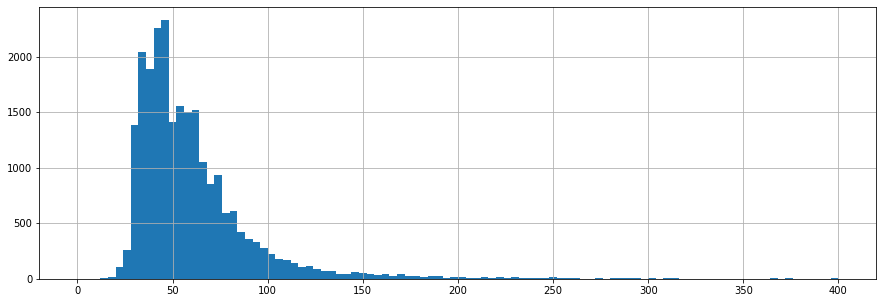

In [34]:
df.total_area.hist(bins=100, range=(0, 400), figsize=(15, 5));

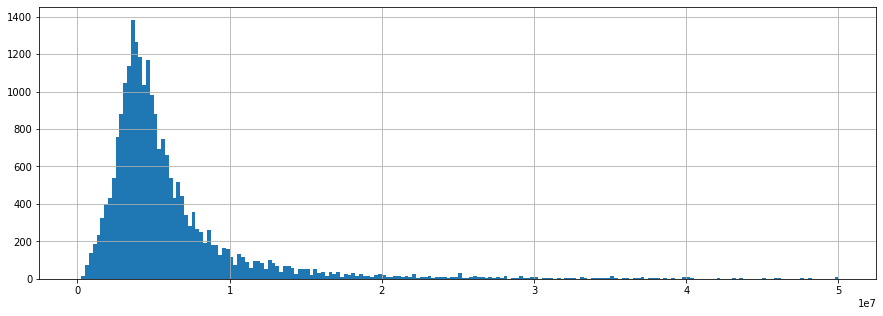

In [33]:
df.last_price.hist(bins=200, range=(0, 50000000), figsize=(15, 5));

Значения в столбцах с ценой и площадью соответствуют распределению Пуассона. Основная масса квартир имеет значения площади ~ 50 кв.м. и стоимости ~ 4-5 млн. руб.

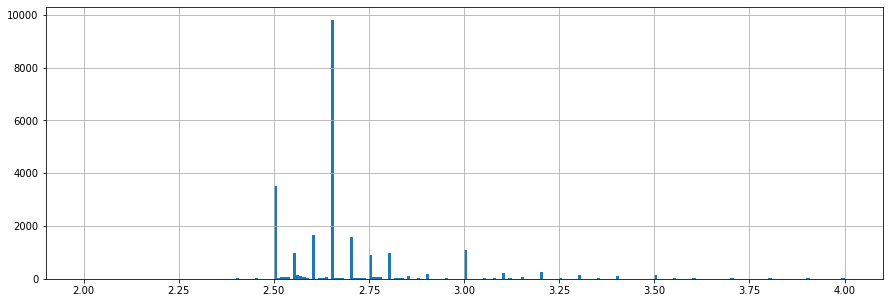

In [36]:
df.ceiling_height.hist(bins=240, range=(2, 4), figsize=(15, 5));

Высота потолков в своей основной массе варьируется от 2.5 м до 3 м включительно

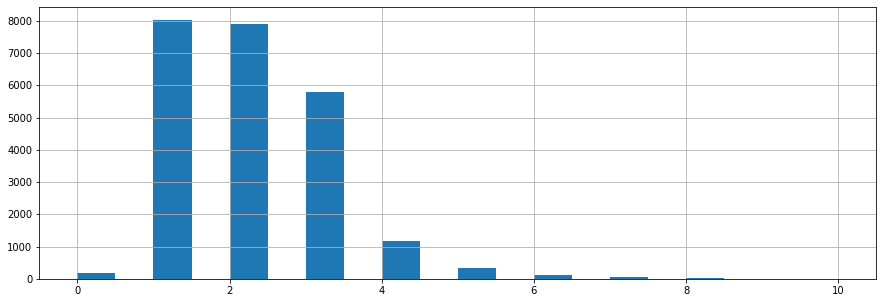

In [39]:
df.rooms.hist(bins=20, range=(0, 10), figsize=(15, 5));

Выведем для данных параметров диаграммы размаха и определим интервалы значений, от которых можно избавиться (1.5 межквартильного размаха)

(0.0, 200.0)

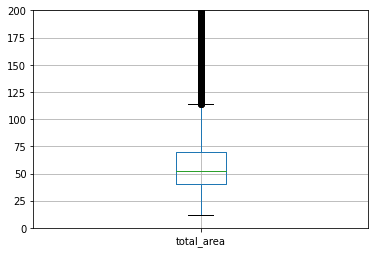

In [40]:
df[['total_area']].boxplot()
plt.ylim(0, 200)

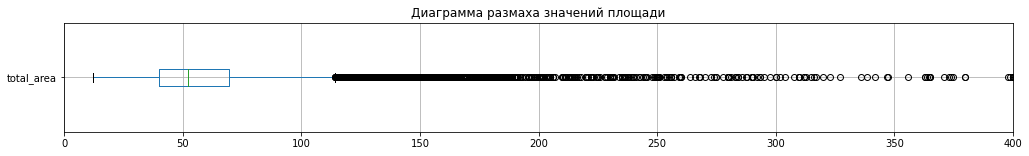

In [41]:
fig, ax = plt.subplots(figsize = (17,2))
ax = df[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

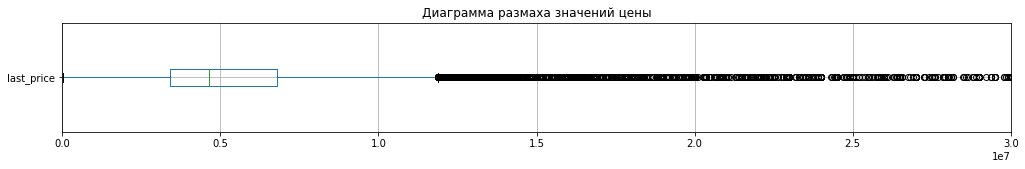

In [42]:
fig, ax = plt.subplots(figsize=(17,2))
ax = df[['last_price']].boxplot(vert=False, ax=ax)
ax.set_title('Диаграмма размаха значений цены')
ax.set_xlim(0, 30000000);

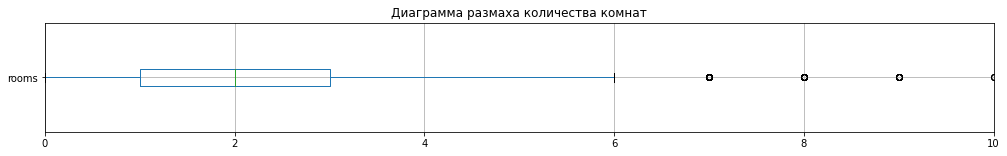

In [43]:
fig, ax = plt.subplots(figsize=(17, 2))
ax = df[['rooms']].boxplot(vert=False, ax=ax)
ax.set_title('Диаграмма размаха количества комнат')
ax.set_xlim(0, 10);

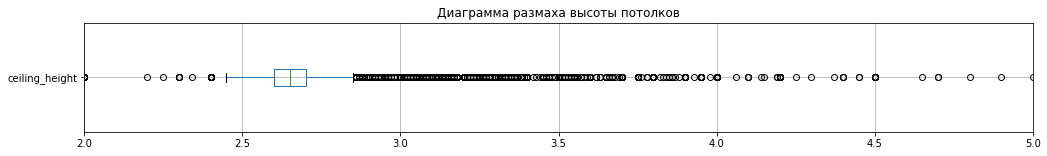

In [44]:
fig, ax = plt.subplots(figsize=(17, 2))
ax = df[['ceiling_height']].boxplot(vert=False, ax=ax)
ax.set_title('Диаграмма размаха высоты потолков')
ax.set_xlim(2, 5);

Большая часть объявлений о продаже однокомнатных и двухкомнатных квартир, чуть меньше трехкомнатных. Квартир без комнат и квартир с более чем 4 комнатами продается сильно меньше, из-за тоо, что таких квартир априори меньше.  

Для точности и удобства анализа можно отбросить строки с площадью более 150 кв.м., стоимостью более 20 млн. руб., высотой потолков более 4 м и квартиры с более, чем 6 комнатами

In [45]:
df1 = df.query('total_area <=150 and last_price <= 20000000 and ceiling_height <= 4 and rooms <= 6') #уберем выбросы
df1

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,check_floor,living_to_total_area_ratio,kitchen_to_total_area_ratio,square_meter_price,weekday,month,year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,True,True,0.472222,0.231481,120370.370370,Четверг,Март,2019,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,3001.0,0,3001.0,81,True,True,0.460396,0.272277,82920.792079,Вторник,Декабрь,2018,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,True,True,0.612500,0.148214,92785.714286,Четверг,Август,2015,Другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,True,True,0.320000,0.410000,100000.000000,Вторник,Июнь,2018,Другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.100000,0,городской посёлок Янино-1,26726.0,65968.0,0,3001.0,0,3001.0,55,True,True,0.473684,0.299342,95065.789474,Понедельник,Сентябрь,2018,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.300000,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,95,True,True,0.547792,0.103356,72490.845228,Вторник,Март,2017,Другой
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.000000,4,False,False,False,8.500000,0,Тосно,26726.0,65968.0,0,3001.0,0,3001.0,45,True,True,0.644068,0.144068,52542.372881,Понедельник,Январь,2018,Другой
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,32.026733,1,False,False,False,10.622431,0,село Рождествено,26726.0,65968.0,0,3001.0,0,3001.0,95,False,True,0.523810,0.187361,44091.710758,Воскресенье,Февраль,2018,Первый
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,43.351884,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602,False,True,0.564830,0.303583,149511.400651,Вторник,Март,2017,Другой


Изучим **время продажи** квартир

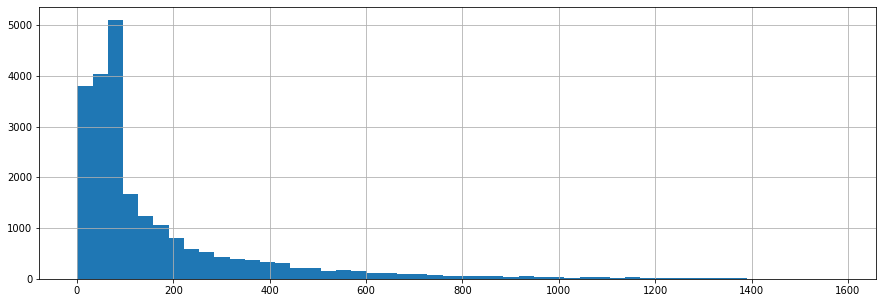

In [47]:
df1.days_exposition.hist(bins=50, figsize=(15, 5)); #гистограммма времени продажи

In [49]:
df1.days_exposition.describe()

count    22655.000000
mean       166.424542
std        203.451156
min          1.000000
25%         45.000000
50%         95.000000
75%        194.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [50]:
too_long_sell = df[df['days_exposition'] > 365 * 2]['days_exposition'].count() #сколько квартир продавалось дольше года
print(f'{too_long_sell} квартир продавалось дольше двух лет')

749 квартир продавалось дольше двух лет


In [51]:
df1[df1['days_exposition'] == 1580] #самая долгая продажа

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,check_floor,living_to_total_area_ratio,kitchen_to_total_area_ratio,square_meter_price,weekday,month,year,floor_type
18843,11,3500000.0,48.2,2014-12-15,2,2.5,5,27.4,2,False,False,False,7.7,3,деревня Новое Девяткино,26726.0,65968.0,0,3001.0,0,3001.0,1580,True,True,0.568465,0.159751,72614.107884,Понедельник,Декабрь,2014,Другой


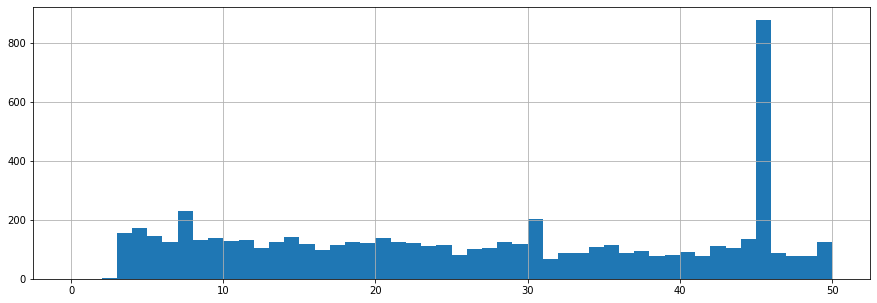

In [53]:
df1.days_exposition.hist(bins=50, range=(0, 50), figsize=(15, 5)); #посмотрим поподробнее на быстрые продажи
                                                                 #(менее 25 перцентиля)

Интересный момент - больше всего быстро проданных квартир продались за 46 дней (более 800 по сравнению с остальными продажами в районе 150

In [54]:
df1.last_price.describe()

count    2.265500e+04
mean     5.330033e+06
std      3.076960e+06
min      1.219000e+04
25%      3.396500e+06
50%      4.500000e+06
75%      6.400000e+06
max      2.000000e+07
Name: last_price, dtype: float64

In [59]:
too_long_sell = df1[df1['days_exposition'] < 4]['days_exposition'].count() #продажа за 5 дней и быстрее
print(f'{too_long_sell} квартир продалось менее, чем за 4 дня')

159 квартир продалось менее, чем за 4 дня


In [61]:
df1[df1['days_exposition'] < 4] #квартиры, проданные за 4 дня и быстрее

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,check_floor,living_to_total_area_ratio,kitchen_to_total_area_ratio,square_meter_price,weekday,month,year,floor_type
294,20,3850000.0,37.0,2018-10-14,1,2.50,16,18.200000,15,False,False,False,8.80000,1,Санкт-Петербург,41359.0,11491.0,2,75.0,0,3001.0,3,True,True,0.491892,0.237838,104054.054054,Воскресенье,Октябрь,2018,Другой
582,13,3500000.0,38.0,2017-07-10,2,2.65,9,21.464125,8,False,False,False,7.11909,0,Санкт-Петербург,11058.0,12575.0,0,3001.0,0,3001.0,3,False,True,0.564830,0.187361,92105.263158,Понедельник,Июль,2017,Другой
952,0,3800000.0,37.7,2017-09-10,1,2.65,24,17.800000,2,False,False,False,11.40000,1,посёлок Мурино,26726.0,65968.0,0,3001.0,0,3001.0,3,True,True,0.472149,0.302387,100795.755968,Воскресенье,Сентябрь,2017,Другой
1298,8,5148000.0,42.9,2018-12-10,1,2.75,11,14.700000,3,False,False,False,14.70000,0,Санкт-Петербург,21927.0,6201.0,0,3001.0,2,466.0,3,True,True,0.342657,0.342657,120000.000000,Понедельник,Декабрь,2018,Другой
1416,4,4740000.0,56.0,2017-09-10,3,2.65,9,36.000000,2,False,False,False,8.00000,0,Санкт-Петербург,23180.0,15794.0,0,3001.0,0,3001.0,3,True,True,0.642857,0.142857,84642.857143,Воскресенье,Сентябрь,2017,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23011,13,3800000.0,44.0,2017-07-14,2,2.55,9,27.000000,6,False,False,False,6.30000,0,Санкт-Петербург,14358.0,15134.0,0,3001.0,1,433.0,3,True,True,0.613636,0.143182,86363.636364,Пятница,Июль,2017,Другой
23116,10,14600000.0,105.0,2018-08-31,3,2.50,14,47.200000,14,False,False,False,22.50000,0,Санкт-Петербург,34526.0,12108.0,0,3001.0,0,3001.0,3,True,True,0.449524,0.214286,139047.619048,Пятница,Август,2018,Последний
23144,10,3790000.0,43.9,2017-11-10,2,2.65,5,27.000000,5,False,False,False,7.10000,1,Санкт-Петербург,48539.0,16467.0,0,3001.0,0,3001.0,3,True,True,0.615034,0.161731,86332.574032,Пятница,Ноябрь,2017,Последний
23371,0,5900000.0,45.0,2018-08-08,2,2.65,5,27.000000,3,False,False,False,6.50000,0,Санкт-Петербург,27358.0,8337.0,0,3001.0,0,3001.0,3,True,True,0.600000,0.144444,131111.111111,Среда,Август,2018,Другой


In [63]:
df1[['days_exposition', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'living_area', 'kitchen_area',
     'airports_nearest', 'city_centers_nearest', 'square_meter_price']].corr().round(2)

,days_exposition,last_price,total_area,rooms,ceiling_height,living_area,kitchen_area,airports_nearest,city_centers_nearest,square_meter_price
days_exposition,1.00,0.08,0.12,0.08,0.07,0.11,0.07,-0.01,-0.02,0.00
last_price,0.08,1.00,0.76,0.48,0.41,0.65,0.58,0.01,-0.50,0.67
total_area,0.12,0.76,1.00,0.80,0.34,0.93,0.55,-0.01,-0.20,0.08
rooms,0.08,0.48,0.80,1.00,0.16,0.88,0.19,-0.04,-0.12,-0.13
ceiling_height,0.07,0.41,0.34,0.16,1.00,0.29,0.29,-0.06,-0.20,0.26
living_area,0.11,0.65,0.93,0.88,0.29,1.00,0.30,-0.03,-0.18,-0.02
kitchen_area,0.07,0.58,0.55,0.19,0.29,0.30,1.00,0.03,-0.15,0.27
airports_nearest,-0.01,0.01,-0.01,-0.04,-0.06,-0.03,0.03,1.00,0.01,0.02
city_centers_nearest,-0.02,-0.50,-0.20,-0.12,-0.20,-0.18,-0.15,0.01,1.00,-0.63
square_meter_price,0.00,0.67,0.08,-0.13,0.26,-0.02,0.27,0.02,-0.63,1.00


Корреляция дней размещения от цены, площади, этажа и количества комнат очень низкая

(0.0, 600.0)

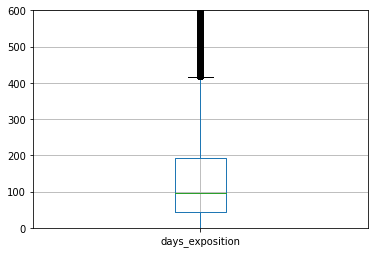

In [64]:
df1[['days_exposition']].boxplot()
plt.ylim(0, 600)

(0.0, 10.0)

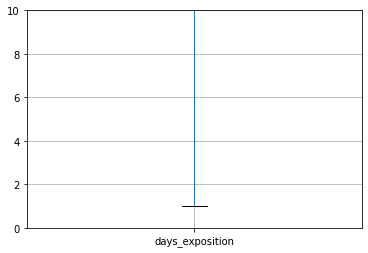

In [65]:
df1[['days_exposition']].boxplot() #масштабируем
plt.ylim(0, 10)

Медианное значение времени продажи = 95 дней. То есть основная масса квартир обычно продается в течение 3 месяцев.  

Однако более трех тысяч квартир продаваилсь дольше года, а одна квартира и вовсе продавалась 1580 дней (почти 4.5 года). Хотя ничего примечателього в этом объялении по сравнению с другими не обнаружено: средней площади двушка, с ценой между 25 перцентилем и медианой. Однако значение среднего арифметического из-за этого сильно смещено в большую сторону и равно 169 дням, хотя на деле 75% всех квартир было продано уже за 198 дней.   

Учитывая, что:
1. среднее время продажи равно примерно 3 месяцам;
2. 75% сделок осуществляются менее, чем за 198 дней (чуть больше полугода);
3. отсутствует связь между временем продажи и основными характеристиками продаваемых объектов недвижимости,  

из проведенного анализа можно заключить следующее:  

* квартиры с временем продажи **дольше 600 дней** - выбивающиеся значения необычно **долгих продаж**
* продажи **быстрее 4 дней** - подозрительно **быстрые продажи**. 

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22655 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 22655 non-null  int64         
 1   last_price                   22655 non-null  float64       
 2   total_area                   22655 non-null  float64       
 3   first_day_exposition         22655 non-null  datetime64[ns]
 4   rooms                        22655 non-null  int64         
 5   ceiling_height               22655 non-null  float64       
 6   floors_total                 22655 non-null  int64         
 7   living_area                  22655 non-null  float64       
 8   floor                        22655 non-null  int64         
 9   is_apartment                 22655 non-null  bool          
 10  studio                       22655 non-null  bool          
 11  open_plan                    22655 non-nu

In [67]:
df1 = df1.query('days_exposition < 600 and days_exposition > 4') #убираем выбросы
df1

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,check_floor,living_to_total_area_ratio,kitchen_to_total_area_ratio,square_meter_price,weekday,month,year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,True,True,0.472222,0.231481,120370.370370,Четверг,Март,2019,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,3001.0,0,3001.0,81,True,True,0.460396,0.272277,82920.792079,Вторник,Декабрь,2018,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,True,True,0.612500,0.148214,92785.714286,Четверг,Август,2015,Другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,True,True,0.320000,0.410000,100000.000000,Вторник,Июнь,2018,Другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.100000,0,городской посёлок Янино-1,26726.0,65968.0,0,3001.0,0,3001.0,55,True,True,0.473684,0.299342,95065.789474,Понедельник,Сентябрь,2018,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.000000,8,False,False,False,8.000000,0,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239,True,True,0.641026,0.128205,73717.948718,Пятница,Август,2016,Другой
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.300000,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,95,True,True,0.547792,0.103356,72490.845228,Вторник,Март,2017,Другой
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.000000,4,False,False,False,8.500000,0,Тосно,26726.0,65968.0,0,3001.0,0,3001.0,45,True,True,0.644068,0.144068,52542.372881,Понедельник,Январь,2018,Другой
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,32.026733,1,False,False,False,10.622431,0,село Рождествено,26726.0,65968.0,0,3001.0,0,3001.0,95,False,True,0.523810,0.187361,44091.710758,Воскресенье,Февраль,2018,Первый


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21213 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 21213 non-null  int64         
 1   last_price                   21213 non-null  float64       
 2   total_area                   21213 non-null  float64       
 3   first_day_exposition         21213 non-null  datetime64[ns]
 4   rooms                        21213 non-null  int64         
 5   ceiling_height               21213 non-null  float64       
 6   floors_total                 21213 non-null  int64         
 7   living_area                  21213 non-null  float64       
 8   floor                        21213 non-null  int64         
 9   is_apartment                 21213 non-null  bool          
 10  studio                       21213 non-null  bool          
 11  open_plan                    21213 non-nu

Перейдем к факторам, влияющим на самый интересный и важный показатель - **стоимость**

Проверим, зависит ли цена от *площади, числа комнат, удалённости от центра*. Изучим зависимость цены от того, на каком этаже расположена квартира: *первом, последнем или другом*. Также изучим зависимость от даты размещения: *дня недели, месяца и года*.

In [69]:
print("Корреляция цены от: ")
print("количества комнат =", df1.last_price.corr(df1.rooms))
print("этажа =", df1.last_price.corr(df1.floor))
print("удаленности от центра =", df1.last_price.corr(df1.city_centers_nearest))
print("дней размещения =", df1.last_price.corr(df1.days_exposition))
print("количества балконов =", df1.last_price.corr(df1.balcony))
print("общей площади =", df1.last_price.corr(df1.total_area))
print("отношения жилой площади к общей площади =", df1.last_price.corr(df1.living_to_total_area_ratio))
print("отношения площади кухни к общей площади =", df1.last_price.corr(df1.kitchen_to_total_area_ratio))

Корреляция цены от: 
количества комнат = 0.4732754321782487
этажа = 0.1026254461489759
удаленности от центра = -0.49826541296598026
дней размещения = 0.056720342363535445
количества балконов = 0.06249143960221657
общей площади = 0.7591709832732476
отношения жилой площади к общей площади = 0.008935134515741839
отношения площади кухни к общей площади = -0.09404858384595945


Довольно сильная (и самая ожидаемая) положительная корреляция в 76% выявлена между *ценой* и *площадью*. Между *количеством комнат* и *удаленности от центра* зависимость цены также прослеживается, но в гораздо меньшей степени (положительная в 47% и отрицательная в 49% соответственно).  

Посмотрим наглядно зависимости

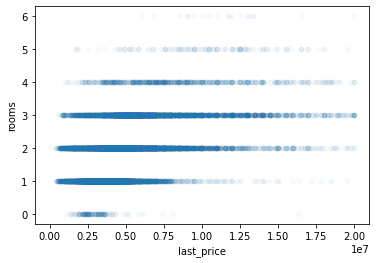

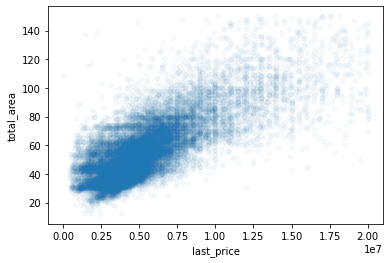

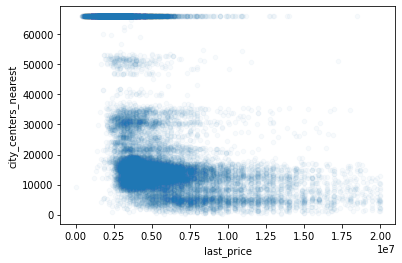

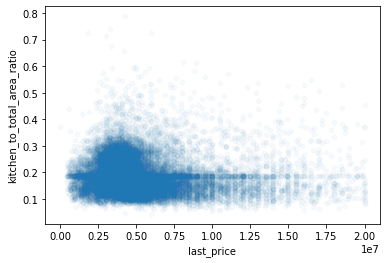

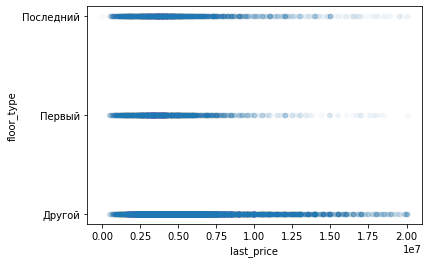

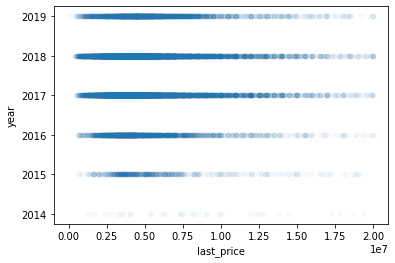

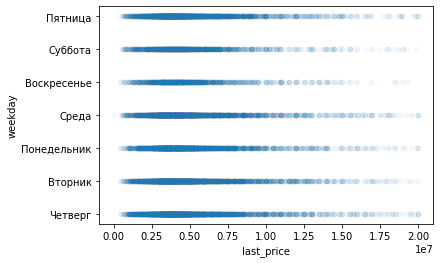

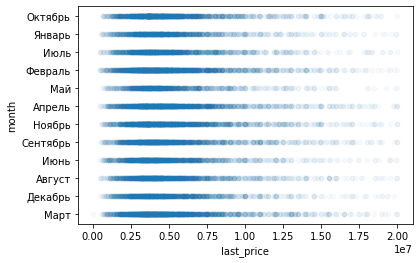

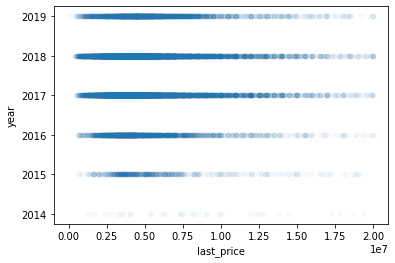

In [71]:
y_list = ['rooms', 'total_area', 'city_centers_nearest', 'kitchen_to_total_area_ratio', 'floor_type', 'year', 'weekday', 'month', 'year']
for y in y_list:
    df1.plot(x='last_price', y=y, kind='scatter', alpha=0.03)

Посмотрим три самых сильных корреляции на графиках плотности типа `hexbin`

### От площади

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

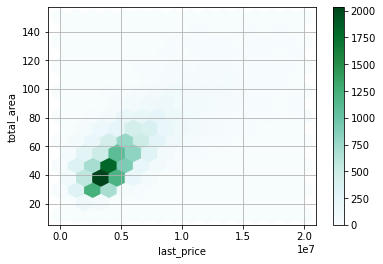

In [72]:
df1.plot(x='last_price', y='total_area', kind='hexbin', gridsize=15, figsize=(6, 4), sharex=False, grid=True)
#зависимость цены от площади

### От количества комнат

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

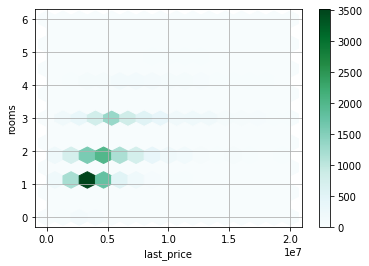

In [73]:
df1.plot(x='last_price', y='rooms', kind='hexbin', gridsize=15, figsize=(6, 4), sharex=False, grid=True)
#зависимость цены от количества комнат

### От удаленности от центра

<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>

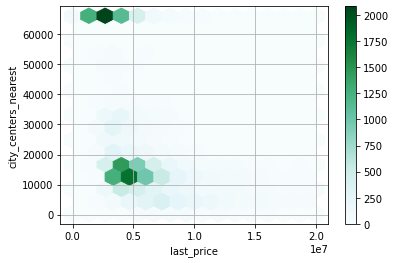

In [74]:
df1.plot(x='last_price', y='city_centers_nearest', kind='hexbin', gridsize=15, figsize=(6, 4), sharex=False, grid=True)

### Вывод

Проведенный анализ отчетливо демонстрирует следующие взаимосвязи цены:  

**От площади**

Самая очевидная взаимосвязь, отчетливая положительная корреляция: чем больше площадь, чем дороже цена. Больше всего объявлений о продаже квартир относительно низкого ценового сегмента 4-5 млн.руб. с площадью менее 30-40 кв.м.

**От количества комнат**  

Также самая неудивительная корреляция. Чем больше комнат - тем выше цена.

**От удаленности от центра**  

Прослеживается некоторая общая обратная зависимость, что также не сюрприз - в большинстве своем квартиры в центре дороже окраин. Поэтому видно большое сосредоточение продаж недорогих квартир, не сильно удаленных от центра. По мере роста обеих величин плотность снижается. Этот параметр ниже мы изучим подробнее.

**От типа этажа**  

Квартиры на первом и последнем этажах намного дешевле "других". Причем последний этаж покупается по более высокой цене, чем первый.

Отберем 10 населенных пунктов с наибольшим числом объявлений

In [75]:
big_ten_list = df1.value_counts('locality_name')[:10].index
big_ten = df1[df1['locality_name'].isin(big_ten_list)]
big_ten

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,check_floor,living_to_total_area_ratio,kitchen_to_total_area_ratio,square_meter_price,weekday,month,year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,True,True,0.472222,0.231481,120370.370370,Четверг,Март,2019,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,3001.0,0,3001.0,81,True,True,0.460396,0.272277,82920.792079,Вторник,Декабрь,2018,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,True,True,0.612500,0.148214,92785.714286,Четверг,Август,2015,Другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,True,True,0.320000,0.410000,100000.000000,Вторник,Июнь,2018,Другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.6,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,3001.0,0,3001.0,155,True,True,0.284182,0.386059,99195.710456,Четверг,Ноябрь,2017,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15,63.0,12,False,False,False,15.00,0,Санкт-Петербург,15632.0,14428.0,0,3001.0,0,3001.0,23,True,True,0.623762,0.148515,91089.108911,Понедельник,Апрель,2019,Другой
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29,True,True,0.461756,0.257790,100566.572238,Среда,Февраль,2018,Другой
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.0,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,3001.0,15,True,True,0.596154,0.115385,105769.230769,Четверг,Июль,2018,Другой
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0,3001.0,1,806.0,519,True,True,0.552812,0.145405,129903.978052,Четверг,Октябрь,2016,Другой


Посчитаем среднюю стоимость квадратного метра для "большой десятки"

In [76]:
big_ten_pivot = big_ten.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
big_ten_pivot.columns = ['count', 'mean']
big_ten_pivot = big_ten_pivot.sort_values(by='mean',ascending=False).reset_index()
big_ten_pivot

,locality_name,count,mean
0,Санкт-Петербург,13802,108870.003467
1,Пушкин,330,101077.615699
2,деревня Кудрово,271,92681.577313
3,посёлок Парголово,310,90091.408101
4,посёлок Мурино,487,85735.570376
5,посёлок Шушары,421,78618.796570
6,Колпино,321,75127.433992
7,Гатчина,283,69013.966497
8,Всеволожск,369,67277.309596
9,Выборг,218,58066.268162


Самое дорогое жилье - в **Питере** со средней стоимостью квадратного метра больше ста тысяч рублей. Самые дешевый населенный пункт Ленобласти из нашей большой десятки - **Выборг**, почти в два раза дешевле северной столицы. Но и самих объявлений там больше всего. Взглянем на графике

<Figure size 1080x504 with 0 Axes>

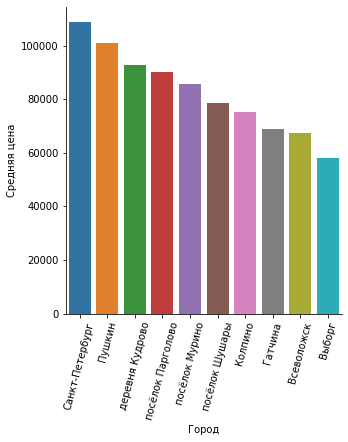

In [77]:
plt.figure(figsize=(15, 7))
sns.catplot(x='locality_name', y='mean', kind='bar', data=big_ten_pivot)
plt.xlabel('Город')
plt.ylabel('Средняя цена')
plt.xticks(rotation=75)
plt.show();

### Квартиры в центре

In [78]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
spb = df1.query('locality_name == "Санкт-Петербург"')
spb['centers_nearest_km'] = (spb.city_centers_nearest/ 1000).astype('int64', errors='raise')
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,check_floor,living_to_total_area_ratio,kitchen_to_total_area_ratio,square_meter_price,weekday,month,year,floor_type,centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,True,True,0.472222,0.231481,120370.370370,Четверг,Март,2019,Другой,16
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,True,True,0.612500,0.148214,92785.714286,Четверг,Август,2015,Другой,13
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,True,True,0.320000,0.410000,100000.000000,Вторник,Июнь,2018,Другой,8
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,40.44293,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,3001.0,0,3001.0,95,False,True,0.564830,0.263966,110544.692737,Четверг,Апрель,2019,Другой,11
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.60000,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,3001.0,0,3001.0,289,True,True,0.714754,0.106557,88524.590164,Воскресенье,Февраль,2017,Другой,15


Проверим, как цена за квадратный метр в питере зависит от удаленности от центра

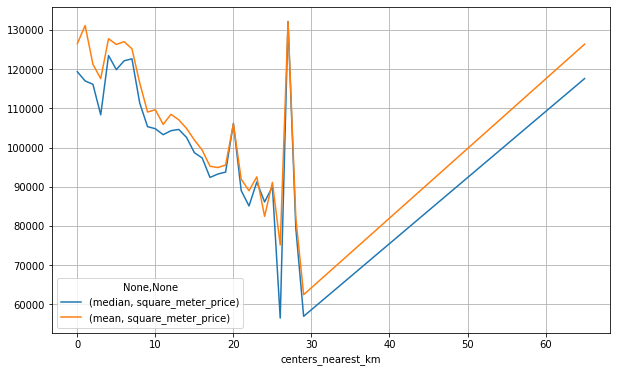

In [80]:
km_to_price = spb.pivot_table(index='centers_nearest_km', values='square_meter_price', aggfunc=['median', 'mean'])
km_to_price.plot(grid=True, figsize=(10, 6))
plt.show()

Видно, что вплоть до 28 километров от центра действует логичная зависимость: чем дальше от центра, тем дешевле квартиры. Длина Невского проспекта примерно 4.5 км. Умножим этот показатель на 1.8 и возьмем получившееся значение за центр.

In [81]:
center = spb.query('centers_nearest_km <= (4.5 * 1.8)')
center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,check_floor,living_to_total_area_ratio,kitchen_to_total_area_ratio,square_meter_price,weekday,month,year,floor_type,centers_nearest_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,True,True,0.320000,0.410000,100000.000000,Вторник,Июнь,2018,Другой,8
24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.5,1,False,False,False,19.6,0,Санкт-Петербург,20052.0,2336.0,3,411.0,3,124.0,265,True,True,0.478395,0.201646,66872.427984,Суббота,Октябрь,2015,Первый,2
52,20,11795000.0,136.0,2017-09-22,6,3.00,2,94.0,2,False,False,False,11.0,1,Санкт-Петербург,16510.0,6582.0,1,526.0,0,3001.0,95,True,True,0.691176,0.080882,86727.941176,Пятница,Сентябрь,2017,Последний,6
63,2,20000000.0,118.0,2018-09-11,3,3.00,9,68.0,7,False,False,False,16.0,0,Санкт-Петербург,26055.0,4800.0,1,648.0,1,779.0,37,True,True,0.576271,0.135593,169491.525424,Вторник,Сентябрь,2018,Другой,4
70,9,3400000.0,30.0,2018-09-05,1,2.65,5,16.0,1,False,False,False,7.0,0,Санкт-Петербург,39053.0,8313.0,1,382.0,0,3001.0,14,True,True,0.533333,0.233333,113333.333333,Среда,Сентябрь,2018,Первый,8


Проведем анализ определенного нами центра. Изучим на этой территории параметры (*площадь, цена, число комнат, высота потолков*).  

<AxesSubplot:>

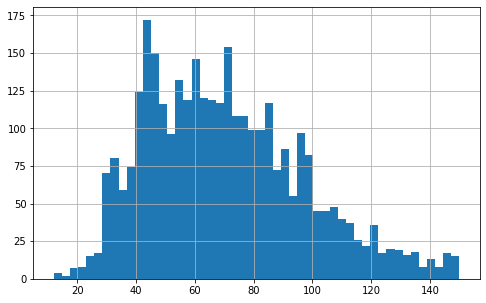

In [82]:
center.total_area.hist(bins=50, figsize=(8, 5))

<AxesSubplot:>

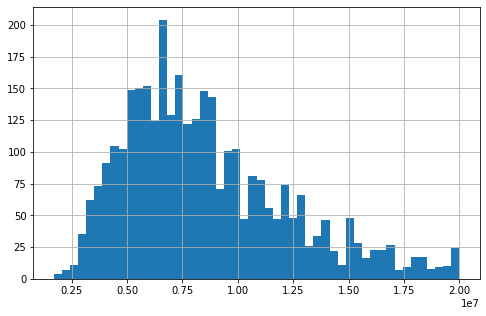

In [83]:
center.last_price.hist(bins=50, figsize=(8, 5))

<AxesSubplot:>

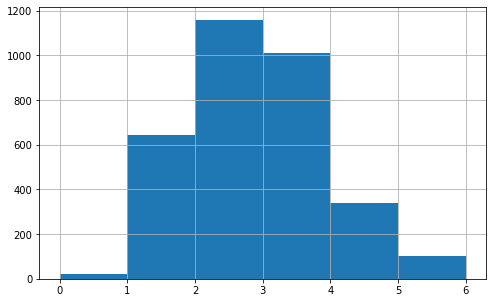

In [84]:
center.rooms.hist(bins=6, figsize=(8, 5))

<AxesSubplot:>

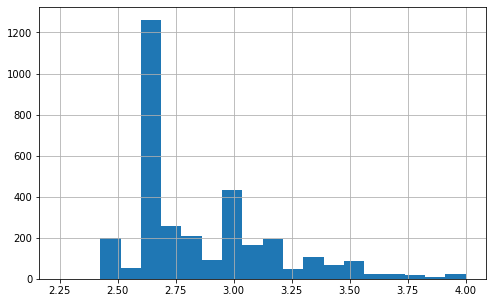

In [85]:
center.ceiling_height.hist(bins=20, range=(2.25, 4), figsize=(8, 5))

Сравним средние значения по основным показателям квартир в центре с теми же показателями по всей базе объявлений

In [86]:
center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,check_floor,living_to_total_area_ratio,kitchen_to_total_area_ratio,square_meter_price,weekday,month,year,floor_type,centers_nearest_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,True,True,0.320000,0.410000,100000.000000,Вторник,Июнь,2018,Другой,8
24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.5,1,False,False,False,19.6,0,Санкт-Петербург,20052.0,2336.0,3,411.0,3,124.0,265,True,True,0.478395,0.201646,66872.427984,Суббота,Октябрь,2015,Первый,2
52,20,11795000.0,136.0,2017-09-22,6,3.00,2,94.0,2,False,False,False,11.0,1,Санкт-Петербург,16510.0,6582.0,1,526.0,0,3001.0,95,True,True,0.691176,0.080882,86727.941176,Пятница,Сентябрь,2017,Последний,6
63,2,20000000.0,118.0,2018-09-11,3,3.00,9,68.0,7,False,False,False,16.0,0,Санкт-Петербург,26055.0,4800.0,1,648.0,1,779.0,37,True,True,0.576271,0.135593,169491.525424,Вторник,Сентябрь,2018,Другой,4
70,9,3400000.0,30.0,2018-09-05,1,2.65,5,16.0,1,False,False,False,7.0,0,Санкт-Петербург,39053.0,8313.0,1,382.0,0,3001.0,14,True,True,0.533333,0.233333,113333.333333,Среда,Сентябрь,2018,Первый,8


In [87]:
param_list = ['last_price', 'total_area', 'rooms', 'ceiling_height']
print('Параметры квартир в центре.')
print()
for param in param_list:
    print('Параметр:', param)
    print('Среднее', round(center[param].mean(), 2))
    print('Медиана: ', round(center[param].median(), 2))
    print()

Параметры квартир в центре.

Параметр: last_price
Среднее 8538631.79
Медиана:  7800000.0

Параметр: total_area
Среднее 70.5
Медиана:  67.5

Параметр: rooms
Среднее 2.4
Медиана:  2.0

Параметр: ceiling_height
Среднее 2.86
Медиана:  2.7



In [88]:
print('Параметры всех квартир ')
print()
for param in param_list:
    print('Параметр:', param)
    print('Среднее', round(df1[param].mean(), 2))
    print('Медиана: ', round(df1[param].median(), 2))
    print()

Параметры всех квартир 

Параметр: last_price
Среднее 5295491.39
Медиана:  4500000.0

Параметр: total_area
Среднее 55.31
Медиана:  50.4

Параметр: rooms
Среднее 1.98
Медиана:  2.0

Параметр: ceiling_height
Среднее 2.68
Медиана:  2.65



Посмотрим наглядно

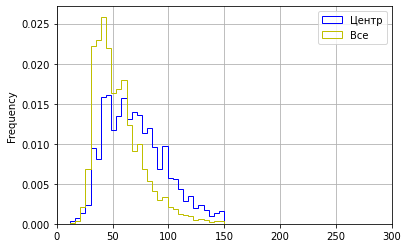

In [89]:
ax = center.total_area.plot( #площадь
    kind='hist',
    histtype='step',
    color='b',
    bins=30,
    label='Центр',
    legend=True,
    density=True,
    xlim=(0, 300),
)
df1.total_area.plot(
    kind='hist',
    histtype='step',
    color='y',
    bins=30,
    label='Все',
    legend=True,
    density=True
)
plt.grid(True)
plt.show()

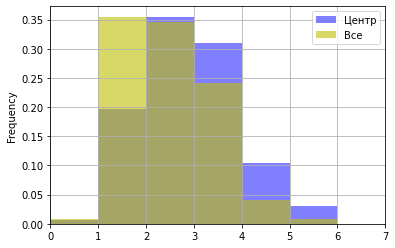

In [90]:
ax = center.rooms.plot( #комнаты
    kind='hist',
    histtype='bar',
    color='b',
    alpha=0.5,
    bins=6,
    label='Центр',
    legend=True,
    density=True,
    xlim=(0, 7),
)
df1.rooms.plot(
    kind='hist',
    histtype='bar',
    color='y',
    alpha=0.6,
    bins=6,
    label='Все',
    legend=True,
    density=True
)
plt.grid(True)
plt.show()

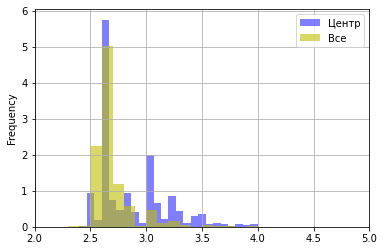

In [91]:
ax = center.ceiling_height.plot( #потолки
    kind='hist',
    histtype='bar',
    color='b',
    alpha=0.5,
    bins=30,
    label='Центр',
    legend=True,
    density=True,
    xlim=(2, 5),
)
df1.ceiling_height.plot(
    kind='hist',
    histtype='bar',
    color='y',
    alpha=0.6,
    bins=30,
    label='Все',
    legend=True,
    density=True
)
plt.grid(True)
plt.show()

Из проведенного аналиа можем заключить, что все средние значения рассмотренных параметров в объявлениях с квартирами в центре выше, чем средние значения по базе объявлений в целом.  

* Цена в почти в *8 000 000* в центре против общей средней цены *4 600 000*;
* Площадь *69 $м^2$* против *52 $м^2$*;
* Медианное значение комнат - одинаковое - *2 комнаты*, среднее больше в центральных объявлениях;
* Высота потолков по среднему также больше в центральных - *2.87* против *2.68*. 

Сравним также скорость продажи квартир в центре с общей скоростью 

In [92]:
print('Среднее время продажи в центре:', round(center.days_exposition.mean(), 2))
print('Среднее время продажи общее:', round(df1.days_exposition.mean(), 2))

Среднее время продажи в центре: 147.24
Среднее время продажи общее: 133.25


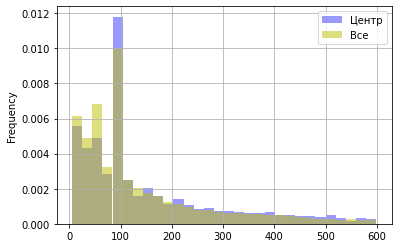

In [93]:
ax = center.days_exposition.plot( #потолки
    kind='hist',
    histtype='bar',
    color='b',
    alpha=0.4,
    bins=30,
    label='Центр',
    legend=True,
    density=True,
)
df1.days_exposition.plot(
    kind='hist',
    histtype='bar',
    color='y',
    alpha=0.5,
    bins=30,
    label='Все',
    legend=True,
    density=True
)
plt.grid(True)
plt.show()

Также посмотрим разницу в цене за квадратный метр 

In [94]:
print('Средняя цена за квадратный метр в центре:', round(center.square_meter_price.mean(), 2))
print('Средняя цена за квадратный метр общая:', round(df1.square_meter_price.mean(), 2))
print('Разница в цене за квадратный метр: ', round(center.square_meter_price.mean() - df1.square_meter_price.mean(), 2))

Средняя цена за квадратный метр в центре: 123637.45
Средняя цена за квадратный метр общая: 94768.18
Разница в цене за квадратный метр:  28869.27


### Влияние на цену

Теперь выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сравним по каждому параметру нашу "центровую" выборку с общим датасетом.

Выделим факторы, влияющие на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) только теперь не для нашей выборки кварти из центра.

In [95]:
print("Корреляция цены от: ")
print("количества комнат =", center.last_price.corr(center.rooms))
print("этажа =", center.last_price.corr(center.floor))
print("удаленности от центра =", center.last_price.corr(center.city_centers_nearest))
print("дней размещения =", center.last_price.corr(center.days_exposition))
print("количества балконов =", center.last_price.corr(center.balcony))
print("общей площади =", center.last_price.corr(center.total_area))
print("отношения жилой площади к общей площади =", center.last_price.corr(center.living_to_total_area_ratio))
print("отношения площади кухни к общей площади =", center.last_price.corr(center.kitchen_to_total_area_ratio))

Корреляция цены от: 
количества комнат = 0.46575888266361215
этажа = 0.12463099600681413
удаленности от центра = -0.20085221127777134
дней размещения = 0.08369820202822446
количества балконов = 0.10358530185255757
общей площади = 0.7379018985930149
отношения жилой площади к общей площади = 7.695128231772852e-05
отношения площади кухни к общей площади = -0.07082509498201399


В центре цена квартиры в наибольшей степени зависит ***количества комнат*** и ***общей площади***. Слабая корреляция также прослеживается между ценой и ***удаленностью от центра*** и совсем небольшая видна между ценой и ***соотношением кухни ко всей квартире***. Между ценой и остальными параметрами зависимость стремится к нулю.

Посмотрим наглядно

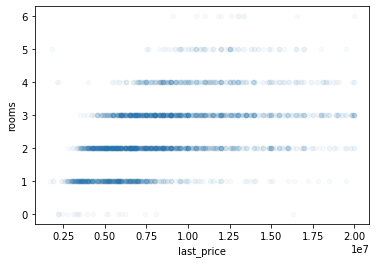

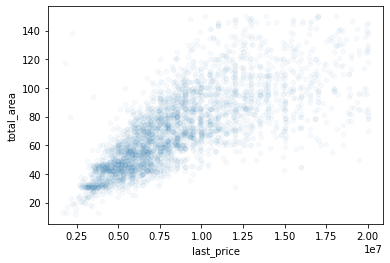

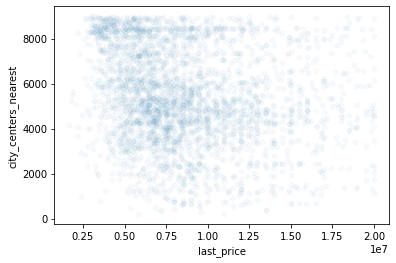

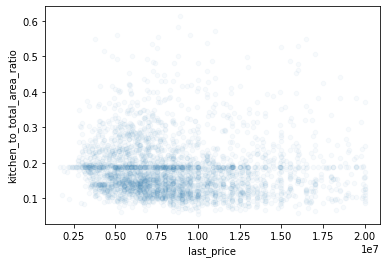

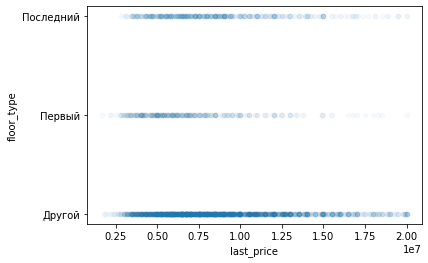

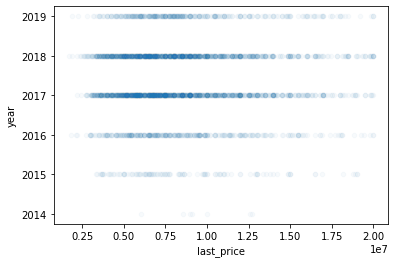

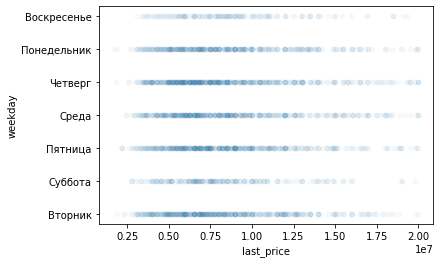

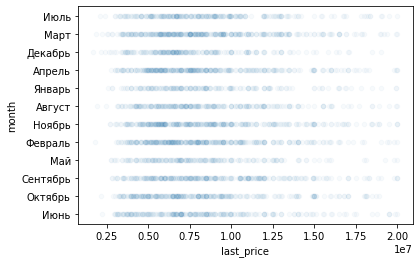

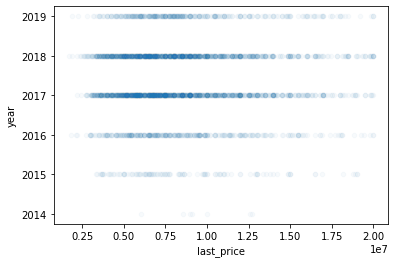

In [96]:
for y in y_list:
    center.plot(x='last_price', y=y, kind='scatter', alpha=0.03)

В нашей выборке, также как и в генеральной совокупности, основное влияние на цену оказывают площадь квартиры и количество комнат. Также как и в квартирах на окраинах, в центровых выкладывают меньше денег за квартиры на первом и последнм этажах.   
Единственный показатель, от которого цена зависит в значительно меньшей степени - это показатель удаленности от центра.

## Общий вывод

Итак, мы провели исследовательский анализ объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

В ходе анализе были выявлены следующие закономерности:

На цену квартир, как в центре Питера, так и на его окраинах положительно влияют 3 самых выжных фактора:

* Площадь;
* Количество комнат;
* Удаленность от центра.

Причем в центре *площадь* и *количетво комнат* влияют на цену немного сильнее, чем на окраинах.

В меньшей степени влияют такие параметры, как 
* этаж (первый и последний этажи дешевле по сравнению с промежуточными);
* год продажи (с каждым годом квартиры дорожают)

Заметных зависимостей площади от остальных параметров не выявлено. 

Разницы между зависимостью площади от проанализированных параметров в центре и на окраинах также обнаружено не было, за исключением параметра *удаленности от центра*. Удаленность от центра города для квартир дальше 18 километров выражена более существенно, чем для квартир в пределах 18 километров, что в целом неудивительно: центр - он и в Африке центр 😑  

Также анализ показал, что квартиры в центре продаются в среднем на 10 дней быстрее, а разница в цене за квадратный метр составляет больше 28 000 

☔☔☔